### Testing Evo

#### Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import torch_geometric
from torch_geometric.nn import GCNConv
import IPython
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from generator import generate_organism
from cell import Cell
from organism import Organism
from GNCAmodel import GNCA
from visualizer import Visualizer
from evo_trainer import Evo_Trainer
from enums import EnvironmentType

%run graphUtils.py
%run Visualizer.py # --allows for reloading the particular code
#%run CGConv.py

#### Train the network

In [2]:
from operator import itemgetter

keys = [0, 1, 2, 3]
vals = [np.array([1,2,3]), np.array([3,4,5]), np.array([6,7,8]), np.array([9,10,11])]
dic = dict(zip(keys, vals))
list(itemgetter(*keys)(dic))

[array([1, 2, 3]), array([3, 4, 5]), array([6, 7, 8]), array([ 9, 10, 11])]

In [3]:
n = 15
popsize = 10
generations = 1000
batch_size = 8
wrap_around = True
with_global_node = False
env_type = EnvironmentType.Clusters
food_amount = 50
name = 'centered18'
#device = torch.device('mps')
device = torch.device('cpu')
trainer = Evo_Trainer(n, device, batch_size, True, with_global_node, food_amount, env_type, popsize)

2023-03-22 22:07:02,462	INFO worker.py:1528 -- Started a local Ray instance.


[2023-03-22 22:07:05] INFO     <67716> evotorch.core: Instance of `Custom_NEProblem` (id:11029653168) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-03-22 22:07:05] INFO     <67716> evotorch.core: Instance of `Custom_NEProblem` (id:11029653168) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-03-22 22:07:05] INFO     <67716> evotorch.core: Instance of `Custom_NEProblem` (id:11029653168) -- The `device` of the problem is set as cpu
[2023-03-22 22:07:05] INFO     <67716> evotorch.core: Instance of `Custom_NEProblem` (id:11029653168) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-03-22 22:07:05] INFO     <67716> evotorch.core: Instance of `Custom_NEProblem` (id:11029653168) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [4]:
#[trainer.searcher.before_step_hook() for i in range(100)]

In [5]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0395)
    mean_eval : 6.8616437911987305
pop_best_eval : 12.7421875
  median_eval : 5.266207218170166

         iter : 2
     stepsize : ReadOnlyTensor(0.0390)
    mean_eval : 8.088556289672852
pop_best_eval : 13.378973007202148
  median_eval : 7.259553909301758

         iter : 3
     stepsize : ReadOnlyTensor(0.0385)
    mean_eval : 9.408300399780273
pop_best_eval : 13.118865013122559
  median_eval : 9.305222511291504

         iter : 4
     stepsize : ReadOnlyTensor(0.0381)
    mean_eval : 8.571592330932617
pop_best_eval : 14.447813987731934
  median_eval : 7.885828971862793

         iter : 5
     stepsize : ReadOnlyTensor(0.0378)
    mean_eval : 9.215374946594238
pop_best_eval : 14.704541206359863
  median_eval : 8.47673511505127

         iter : 6
     stepsize : ReadOnlyTensor(0.0374)
    mean_eval : 11.006303787231445
pop_best_eval : 14.775663375854492
  median_eval : 10.024897575378418

         iter : 7
     stepsize : ReadOn

In [ ]:
network = trainer.get_trained_network()

In [ ]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
network.load_state_dict(torch.load('../models/' + name + '.pth'))

<All keys matched successfully>

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [ ]:
#trainer.searcher.status

#### Visualize trained network

In [ ]:
v_batch_size= 8
graphs = [generate_organism(n, device, with_global_node, food_amount, env_type).toGraph() for _ in range(v_batch_size)]
loader = DataLoader(graphs, batch_size=v_batch_size)
graph = next(iter(loader))
visualizer = Visualizer(wrap_around, v_batch_size)
network.batch_size = v_batch_size
network(graph, 0)

DataBatch(x=[1720, 5], edge_index=[1, 0], device=[8], subsize=[8], energy=[8], velocity=[8], border_cost=[8], food_reward=[8], dead_cost=[8], visible_food=[8], food_avg_dist=[8], food_avg_degree=[8], food_search_movement=[8], batch=[1720], ptr=[9])

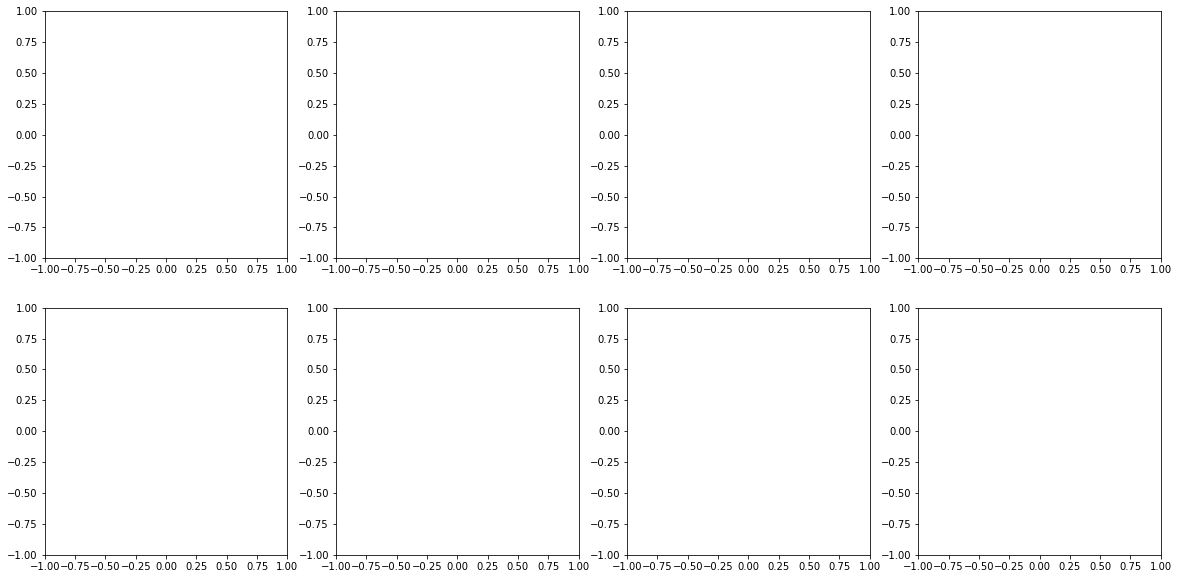

In [ ]:
#anim = visualizer.animate_organism(graph, network, food=30, frames=10) #test environment
#visualizer.save_animation_to_gif(anim, name, fps=10, dpi=200) #beautiful

anim = visualizer.animate_organism(graph, network, food=30, frames=200) #visualize model
visualizer.save_animation_to_gif(anim, name, fps=10, dpi=50) #fast

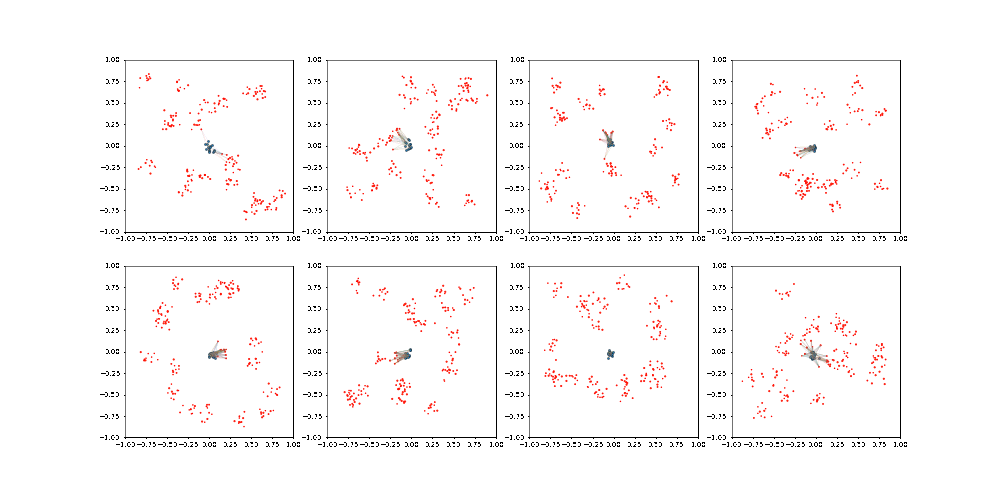

In [ ]:
Image('../animation/' + name + '.gif')

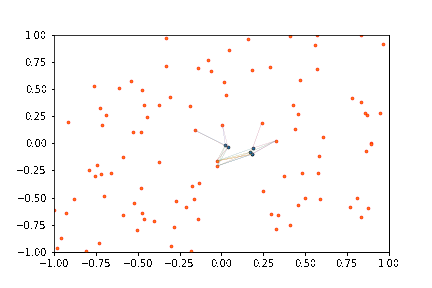

In [ ]:
Image('../animation/GATConv1.gif')

In [ ]:
#anim.frame_seq = anim.new_saved_frame_seq() 
#IPython.display.HTML(anim.to_jshtml())

In [ ]:
print(network)

Conv(
  (conv_layer_food): CustomConvSimple(2, dim=3)
  (conv_layer_cell): CustomConvSimple(2, dim=3)
  (gConvGRU): GConvGRU(
    (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
    (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
    (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
  )
  (mlp_before): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Tanh()
  )
  (conv_layer_cells): CustomConvSimple(2, dim=3)
)


In [ ]:
print('GConvGRU: ', network.gConvGRU)
for param in network.gConvGRU.parameters():
  print(param.data)


GConvGRU:  GConvGRU(
  (conv_x_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_z): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_r): ChebConv(4, 4, K=1, normalization=sym)
  (conv_x_h): ChebConv(4, 4, K=1, normalization=sym)
  (conv_h_h): ChebConv(4, 4, K=1, normalization=sym)
)
tensor([-0.1328,  0.3798, -0.0414, -0.2267])
tensor([[-1.5019,  0.1471, -0.6194, -0.3031],
        [ 0.4383,  0.2806, -0.2522, -0.2638],
        [-0.1036, -0.1144,  0.9409, -0.1860],
        [-0.3827, -0.1772, -0.3940,  0.6037]])
tensor([-0.4408,  0.6124,  0.1503, -0.8817])
tensor([[-0.2465, -0.0815, -0.1721,  0.2433],
        [-0.2816,  0.9112,  0.4683, -0.0640],
        [-0.6932, -1.1345, -0.5645,  0.7772],
        [ 0.1503, -1.3418, -0.0375, -0.1415]])
tensor([-0.0039,  0.1907,  0.2914,  0.5110])
tensor([[-0.1870,  0.1804, -0.7591,  0.0748],
        [-0.1818, -0.6886, -0.3718,  0.6470],
        [-0.4441,  0.0567, -0.8424,  0.2851],
        [ 0.0066

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

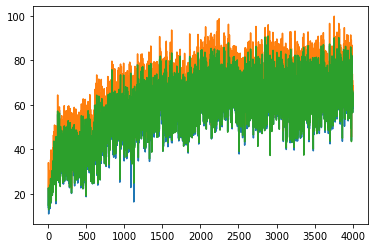

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()

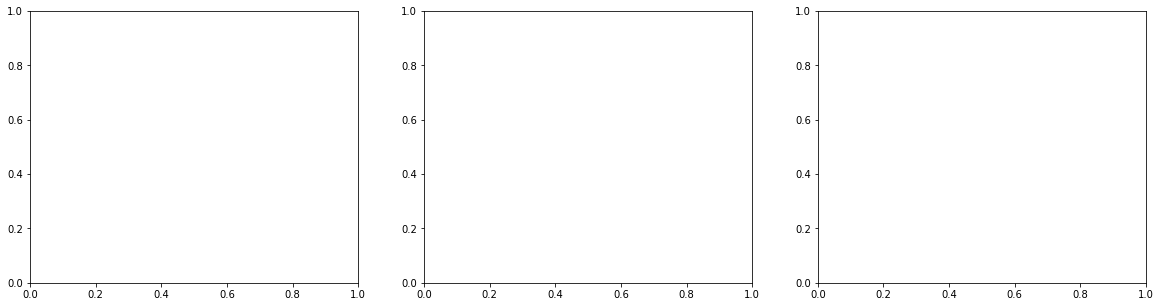

In [ ]:
trainer.logger_df
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle('')
plt.show()

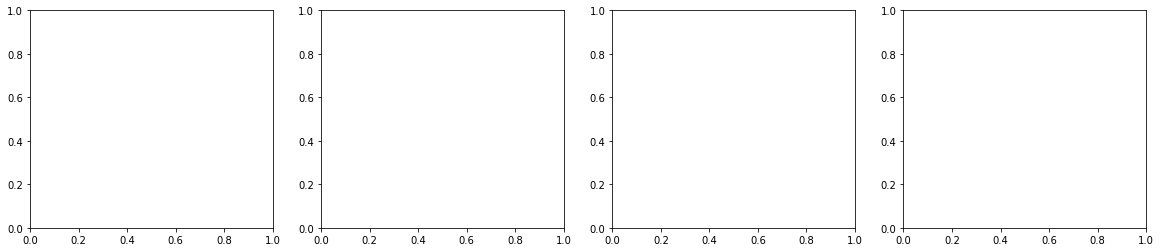

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,4))